In [46]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Create middleware 1 logs

In [ ]:
mw=1
path_to_experiment=path_to_experiment="/home/anastasiia/final_ex/final_copy/"
path_to_logs = "/home/anastasiia/final_ex/final_copy/middleware1_logs/"

mw_log = open(path_to_experiment+"mw_"+str(mw)+".log","r")
lines = mw_log.readlines()

def is_zero(line):
    parts = line.split(" ")
    if (parts[1] == '0' and parts[2] == '0' and parts[3] == '0' and parts[4] == '0' and parts[5] == '0' and
        parts[6] == '0' and parts[7] == '0' and parts[8] == '0' and parts[9] == '0' and parts[10] == '0'):
        return True
    return False

def check_following_lines(i):
    all_zero = True
    
    n = 0
    for j in range(64):
        n = j
        parts = lines[i+j].split(" ")
        if parts[0] == str(j) and is_zero(lines[i+j]):
            continue
        elif (j == 8 or j == 32) and lines[i + j] != "DEBUG ethz.Middleware: CLIENT DISCONNECTED":
            break
        else:
            all_zero = False
            break
        
    return all_zero, n

new_experiment_positions=[]
new_experiment_positions_end=[]
invalidated_experiments=[]

i = 0
while i < len(lines):
    parts = lines[i].split(" ")
    if is_zero(lines[i]) or lines[i].startswith("DEBUG ethz.StatPrinter") or lines[i].startswith("SIGTERM call") or lines[i].startswith("DEBUG ethz.Middleware: CLIENT DISCONNECTED") :
        i += 1
        continue
    new_experiment_positions.append(i)
    while True:
        if not is_zero(lines[i]):
            i += 1
        elif is_zero(lines[i]):
            condition, nlines = check_following_lines(i)
            if (condition):
                break
            else:
                print("line numer="+str(i))
                print("condition not ok")
                i+=1
                continue
    new_experiment_positions_end.append(i)

for i in range(len(new_experiment_positions)):
    for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
            
for i in range(len(new_experiment_positions)):
    if i not in invalidated_experiments:
        f = open(path_to_logs+"log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()
#print(new_experiment_positions)
#print("\n")
#print(new_experiment_positions_end)
#print([[a, b] for a, b in zip(new_experiment_positions, new_experiment_positions_end)])
j = 0
for i in new_experiment_positions:
    print(j)
    print(i)
    print(lines[i])
    j += 1

## Create middleware 2 logs

In [ ]:
mw=2
path_to_experiment=path_to_experiment="/home/anastasiia/final_ex/final_copy/"
path_to_logs = "/home/anastasiia/final_ex/final_copy/middleware2_logs/"

mw_log = open(path_to_experiment+"mw_"+str(mw)+".log","r")
lines = mw_log.readlines()

def is_zero(line):
    parts = line.split(" ")
    if (parts[1] == '0' and parts[2] == '0' and parts[3] == '0' and parts[4] == '0' and parts[5] == '0' and
        parts[6] == '0' and parts[7] == '0' and parts[8] == '0' and parts[9] == '0' and parts[10] == '0'):
        return True
    return False

def check_following_lines(i):
    all_zero = True
    
    n = 0
    for j in range(64):
        n = j
        parts = lines[i+j].split(" ")
        if parts[0] == str(j) and is_zero(lines[i+j]):
            continue
        elif j == 8 or j == 32:
            break
        else:
            all_zero = False
            break
        
    return all_zero, n

new_experiment_positions=[]
new_experiment_positions_end=[]
invalidated_experiments=[]

i = 0
while i < len(lines):
    parts = lines[i].split(" ")
    if is_zero(lines[i]) or lines[i].startswith("DEBUG ethz.StatPrinter") or lines[i].startswith("SIGTERM call") or lines[i].startswith("DEBUG ethz.Middleware: CLIENT DISCONNECTED"):
        i += 1
        continue
    new_experiment_positions.append(i)
    while True:
        if not is_zero(lines[i]):
            i += 1
        elif is_zero(lines[i]):
            condition, nlines = check_following_lines(i)
            if (condition):
                break
            else:
                print("line numer="+str(i))
                print("condition not ok")
                i+=1
                continue
    new_experiment_positions_end.append(i)

for i in range(len(new_experiment_positions)):
    for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
            
for i in range(len(new_experiment_positions)):
    if i not in invalidated_experiments:
        f = open(path_to_logs+"log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()

In [57]:
#### v1
#ex1
#log1 log2 log3 log4 |w1|
#log5 log6 log7 log8 |w2|
#log9 log10 log11 log12 |w3|
#
#log13 log14 log15 log16 |w1|
#log17 log18 log19 log20 |w2|
#log21 log22 log23 log24 |w3|
#
#log25 log26 log27 log28 |w1|
#log29 log30 log31 log32 |w2|
#log33 log34 log35 log36 |w3|
#
#log37 log38 log39 log40 |w1|
#log41 log42 log43 log44 |w2|5534
#log45 log46 log47 log48 |w3|

logs_per_experiment = 36
path_to_logs = "/home/anastasiia/final_ex/final_copy/middleware1_logs/"

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

data=[]
k = 108
l = 0
for v in value_sizes:
    print("k="+str(k))
    for w in workers:
        for client in client_numbers:
            for rep in range(repetitions):
                data.append(pd.read_csv(path_to_logs+"log_"+str(k)+".log", header=None, delimiter=' '))
                for j in range(w):
                    d = data[l].index[data[l][0] == j].tolist()
                    data[l] = data[l].drop([d[0]])
                    data[l] = data[l].drop([d[len(d)-1]])
                k += 1
                l += 1
    k += logs_per_experiment * 3
        
global_data_10 = pd.DataFrame(columns=['Middleware','Worker threads',
                                    'Value size',
                                    'Client number',
                                    'Repetition',
                                    'Worker thread',
                                    'Time1',
                                    'Time2',
                                    'Time3',
                                    'Time4',
                                    'Time5',
                                    'Queue size',
                                    'Left queue',
                                    'Successful',
                                    'Per server1',
                                    'Per server2',
                                    'Per server3',
                                    'Duration'])

print("Start adding data to global table")
k = 0
m = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                print("m="+str(m))
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [1, w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [1, w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data_10.loc[k] = newline
                    k += 1
                m += 1    


k=108
k=252
k=396
k=540
Start adding data to global table
m=0
m=1
m=2
m=3
m=4
m=5
m=6
m=7
m=8
m=9
m=10
m=11
m=12
m=13
m=14
m=15
m=16
m=17
m=18
m=19
m=20
m=21
m=22
m=23
m=24
m=25
m=26
m=27
m=28
m=29
m=30
m=31
m=32
m=33
m=34
m=35
m=36
m=37
m=38
m=39
m=40
m=41
m=42
m=43
m=44
m=45
m=46
m=47
m=48
m=49
m=50
m=51
m=52
m=53
m=54
m=55
m=56
m=57
m=58
m=59
m=60
m=61
m=62
m=63
m=64
m=65
m=66
m=67
m=68
m=69
m=70
m=71
m=72
m=73
m=74
m=75
m=76
m=77
m=78
m=79
m=80
m=81
m=82
m=83
m=84
m=85
m=86
m=87
m=88
m=89
m=90
m=91
m=92
m=93
m=94
m=95
m=96
m=97
m=98
m=99
m=100
m=101
m=102
m=103
m=104
m=105
m=106
m=107
m=108
m=109
m=110
m=111
m=112
m=113
m=114
m=115
m=116
m=117
m=118
m=119
m=120
m=121
m=122
m=123
m=124
m=125
m=126
m=127
m=128
m=129
m=130
m=131
m=132
m=133
m=134
m=135
m=136
m=137
m=138
m=139
m=140
m=141
m=142
m=143


In [58]:
k1 = k # we continue to add to the table
path_to_logs = "/home/anastasiia/final_ex/final_copy/middleware2_logs/"

data=[]
k = 36
l = 0
for v in value_sizes:
    for w in workers:
        for client in client_numbers:
            for rep in range(repetitions):
                data.append(pd.read_csv(path_to_logs+"log_"+str(k)+".log", header=None, delimiter=' '))
                for j in range(w):
                    d = data[l].index[data[l][0] == j].tolist()
                    data[l] = data[l].drop([d[0]])
                    data[l] = data[l].drop([d[len(d)-1]])
                k += 1
                l += 1
    k += logs_per_experiment

    
m = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                print(m)
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [2, w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [2, w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data_10.loc[k1] = newline
                    k1 += 1
                m += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


In [38]:
global_data_10.to_pickle("/home/anastasiia/global_data_10.pkl")

In [16]:
global_data_10 = pd.read_pickle("/home/anastasiia/global_data_10.pkl")

Start drawing graphs


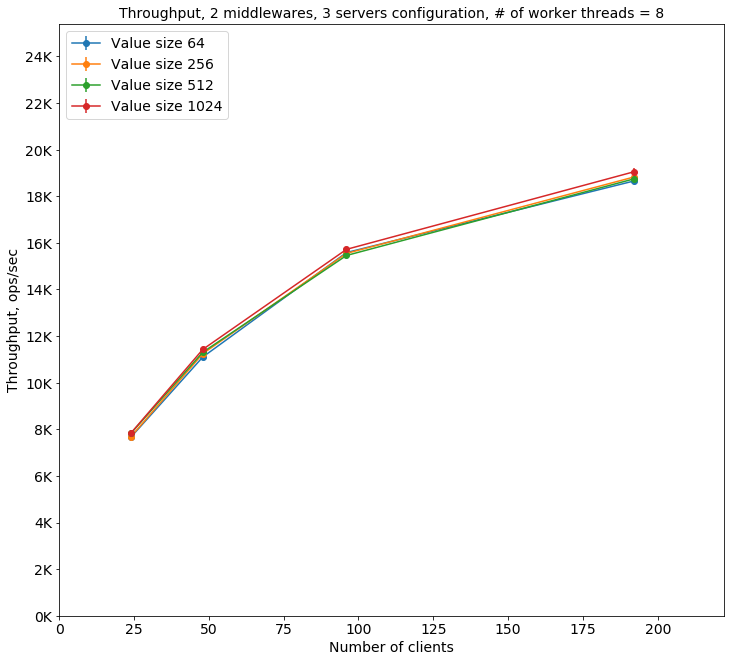

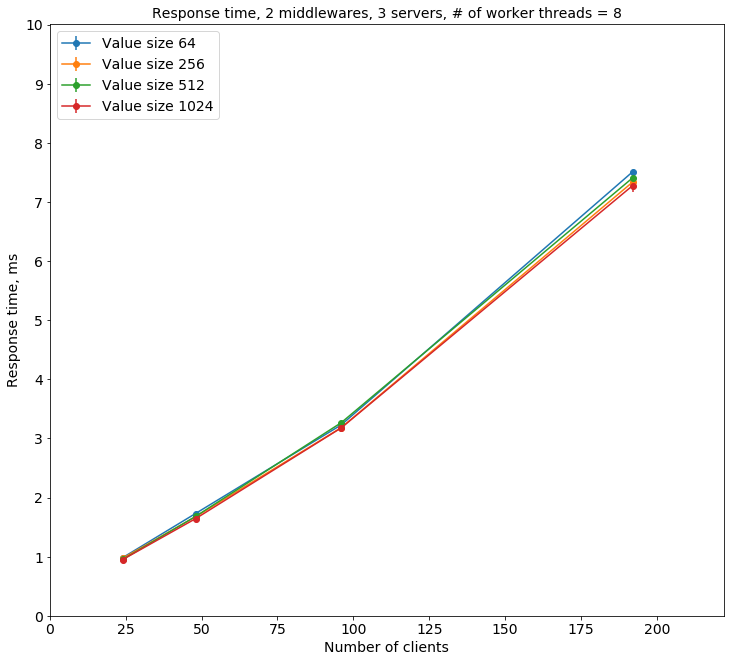

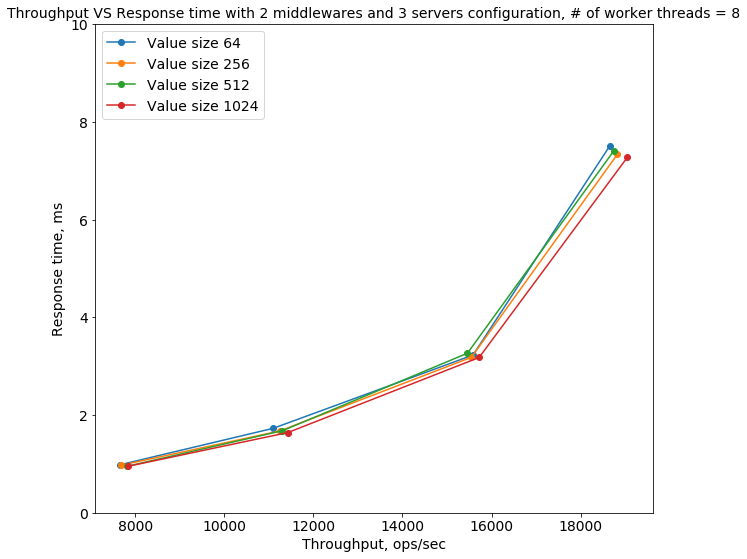

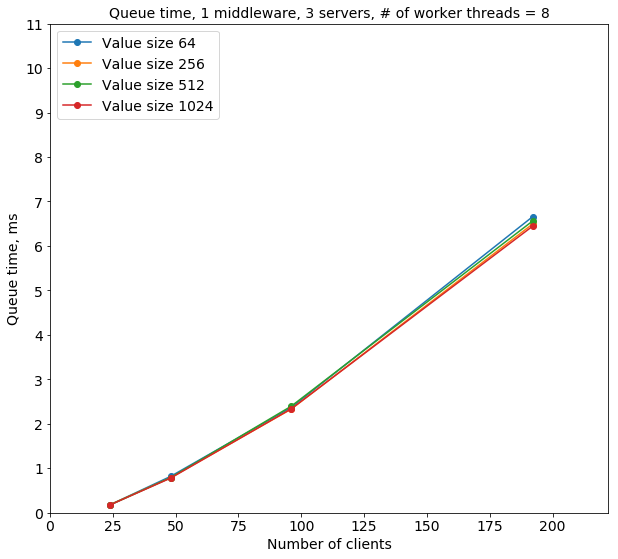

[[0.1823949326227799, 0.8184980278051983, 2.3667258265740423, 6.655997556444671], [0.18552184755126322, 0.7885057167272067, 2.3322698649883393, 6.491863948247044], [0.1792641461225506, 0.7908107610406893, 2.397067629438224, 6.559274087746318], [0.1796301808535345, 0.7798683101904558, 2.33721040235397, 6.44266322635562]]


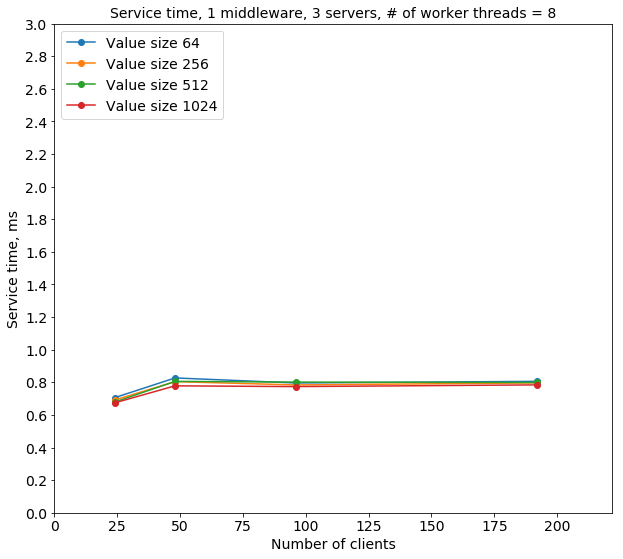

[[0.7061927621515207, 0.8269813063001681, 0.796154024623378, 0.8061310474763995], [0.691868150640369, 0.8042277425197375, 0.7840390686075623, 0.7964964044555055], [0.679518995800549, 0.8058175804667326, 0.8014190773277051, 0.7990060951435575], [0.6743812087649689, 0.7785012664866976, 0.7739246312135862, 0.7843409099977389]]


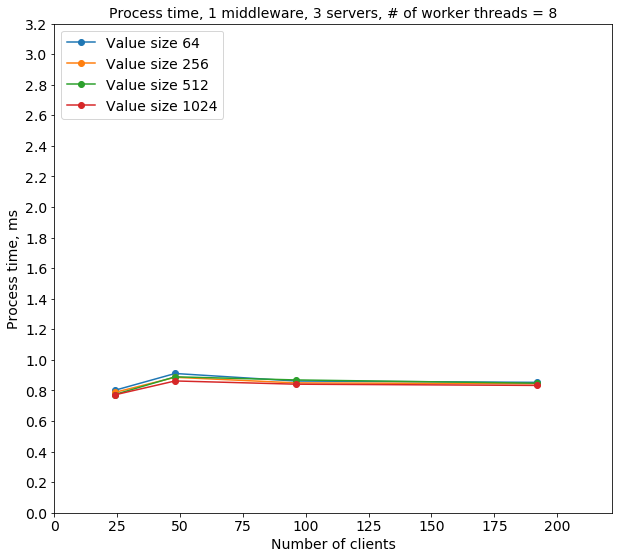

[[0.8012241522140332, 0.9111858713340943, 0.8619186041728304, 0.8531821342234385], [0.7876148830666713, 0.886155187461412, 0.8497540894382156, 0.8439232641741009], [0.7736233858974442, 0.8894291412421741, 0.8690349139599775, 0.8477404301157057], [0.7713905343831059, 0.8623888446398686, 0.8412548198312815, 0.8331677018633541]]


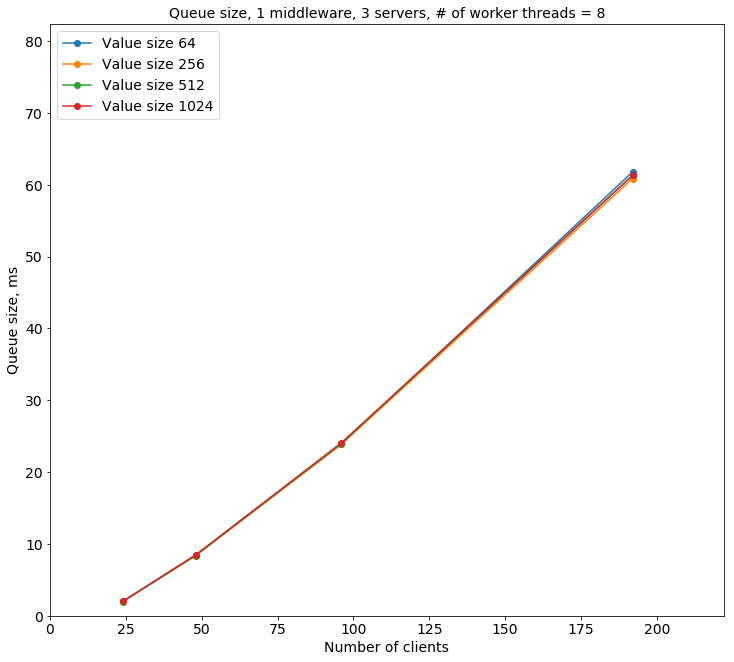

[[1.9916837412725454, 8.44678584675961, 23.85222846803703, 61.79035845867964], [2.0178020791557927, 8.353505958401087, 23.863237443057933, 60.854615224294136], [1.973196889392619, 8.390783728264354, 23.97776272387474, 61.294027952240256], [2.008053199527668, 8.472689248728418, 24.06791868104624, 61.29867211087023]]


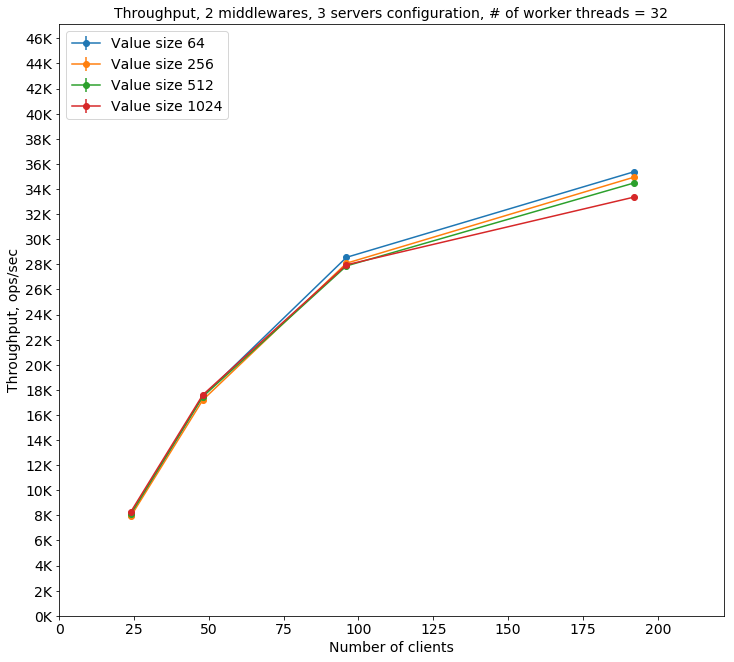

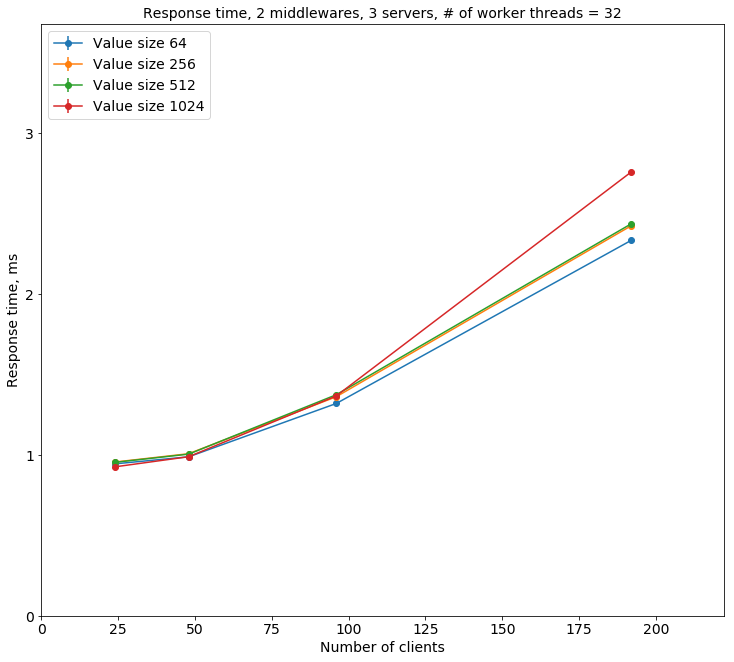

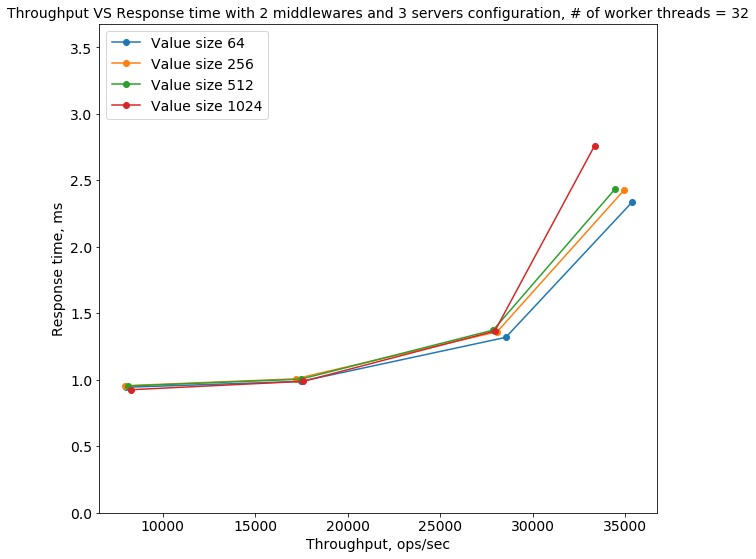

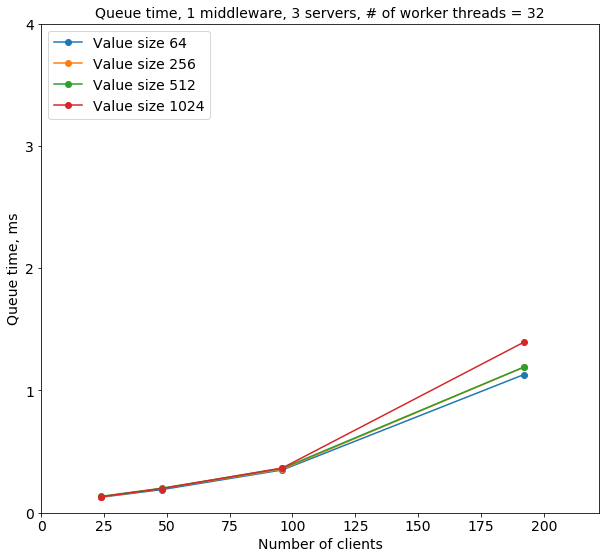

[[0.12779331791723147, 0.18945831494539955, 0.3504791827895423, 1.1294119250591892], [0.13007756213722474, 0.19826326982149378, 0.35670904057962544, 1.1893136480795559], [0.13485910966483247, 0.20073806504525002, 0.3634082639725347, 1.1908987001252402], [0.1318496558868871, 0.19818583096040404, 0.3664717323898813, 1.394062555167423]]


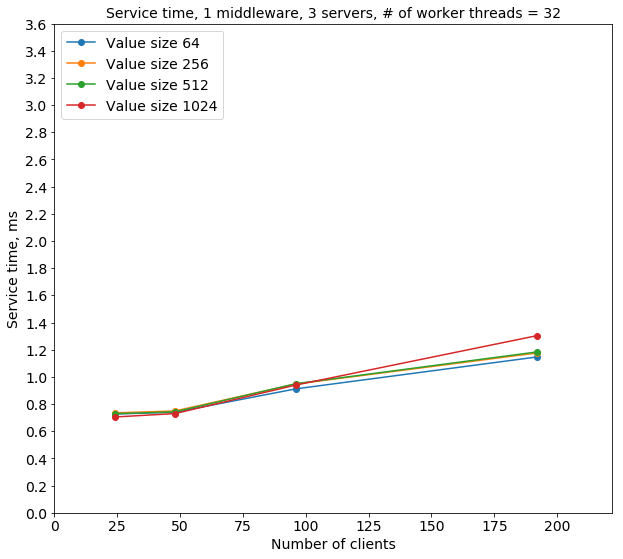

[[0.7271126704409537, 0.7400537905747363, 0.9119798301591062, 1.1467029244826676], [0.7354290848003658, 0.7494334414538268, 0.9475207426451254, 1.1760553425374196], [0.7292256387893942, 0.7428169668599218, 0.9499047404550008, 1.183700769383264], [0.7050461681487371, 0.7301731704161476, 0.9399101426477212, 1.3035627621509804]]


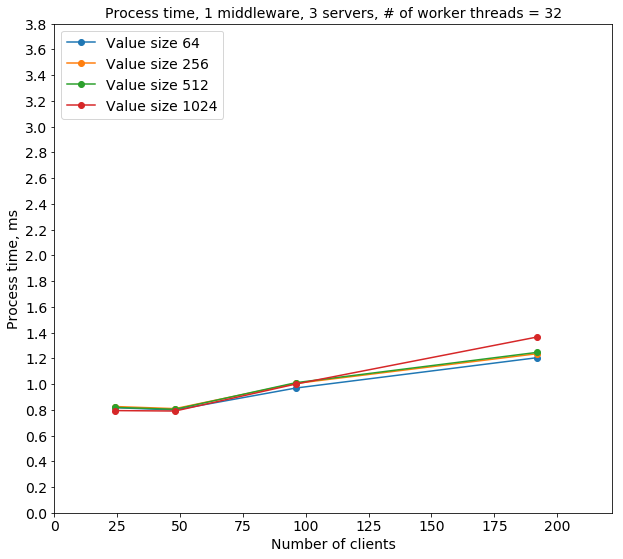

[[0.816498843792361, 0.7986130998769964, 0.9689347021516306, 1.204683626678669], [0.8254958480456396, 0.8090808087317443, 1.0046723903707382, 1.2355130174949858], [0.8187809249181426, 0.8040044567073416, 1.0104859101619872, 1.2460257257197782], [0.7938393430017147, 0.7904940432966836, 0.9999510249182282, 1.3652564720037053]]


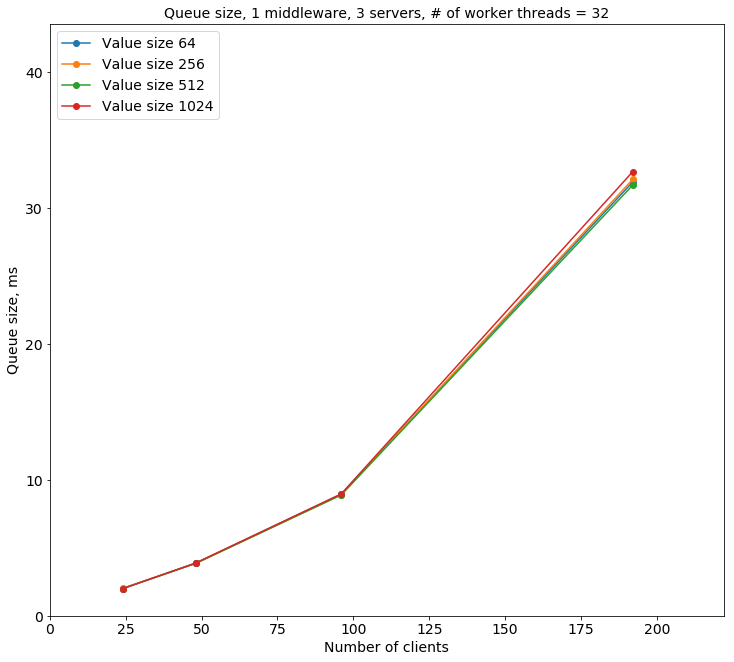

[[2.0056442070010365, 3.8755501708904134, 8.941695071963178, 31.933035222320306], [2.0217366452518784, 3.8553276790850095, 8.90534250927576, 32.126845143913116], [2.0039750256473594, 3.854650887831209, 8.897036705009691, 31.702444449281234], [1.99887005789408, 3.8768947981271444, 8.975437804214131, 32.68835565249644]]


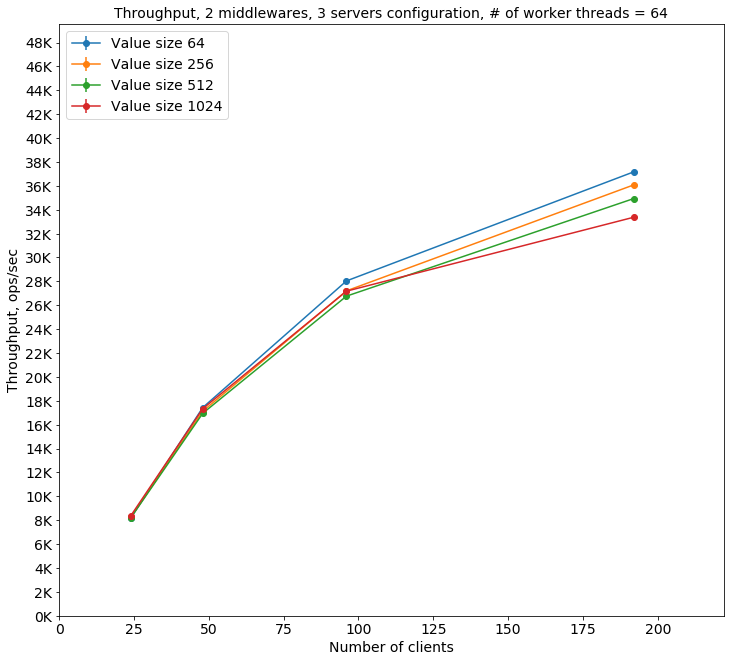

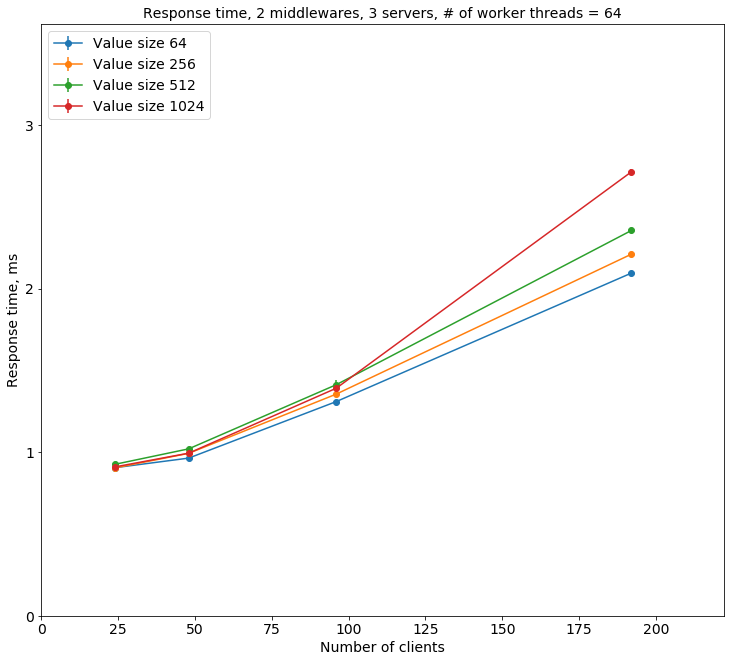

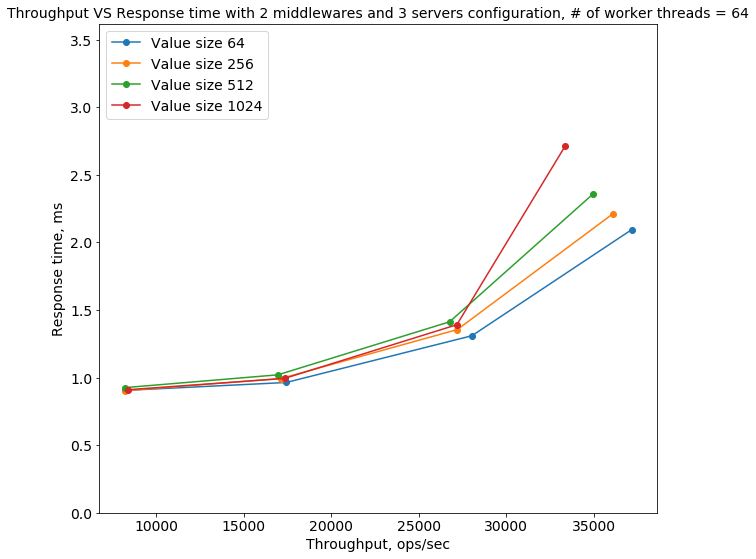

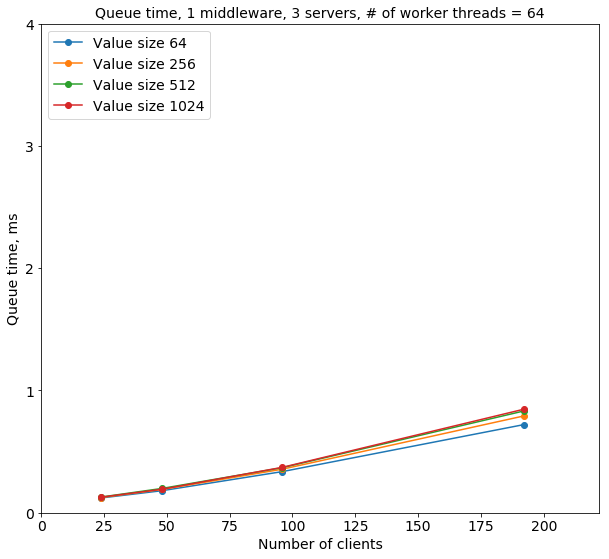

[[0.12156324258647909, 0.18048833861689353, 0.3369079453577078, 0.7206907820725421], [0.12504674151105832, 0.19055259870442726, 0.35660596784803494, 0.7915313612676538], [0.129218396895407, 0.1988148518171677, 0.3690108254608049, 0.8321510014666493], [0.12807043372921353, 0.19260322703219787, 0.3717378183553263, 0.8465282210442303]]


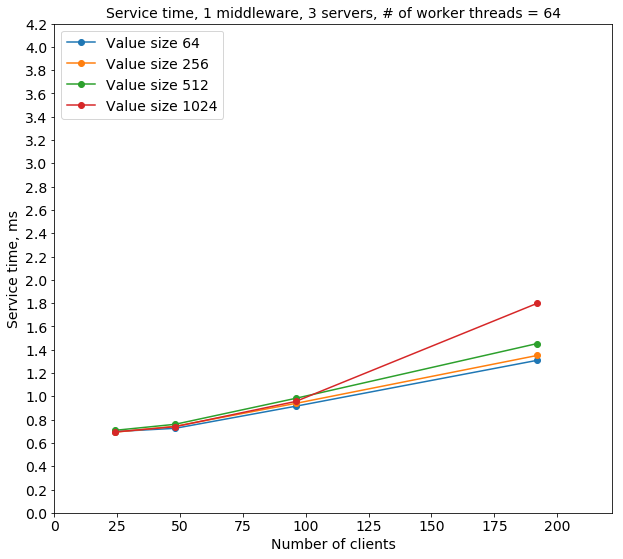

[[0.6973597202968533, 0.7251852579551946, 0.9149311960038284, 1.30876917955834], [0.6919905237409606, 0.7424490031741204, 0.939330271061912, 1.350514045634865], [0.7078085500989667, 0.759824401884795, 0.9828064204822523, 1.452589005884211], [0.6937877494818085, 0.7393673976009427, 0.9560011237207912, 1.7977748186274043]]


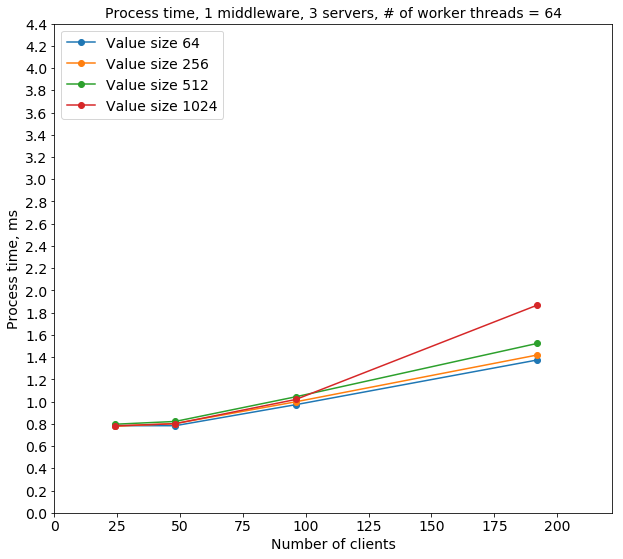

[[0.7835113145022882, 0.7832362801461473, 0.9723269648859022, 1.3739906103674975], [0.7785464849762535, 0.8023061542850626, 0.9983383062258855, 1.418749466156868], [0.7965007870579618, 0.8214781725483105, 1.0433518575984535, 1.5229664479022456], [0.7819172689580517, 0.8012413709490219, 1.0191015554174907, 1.8670335350684415]]


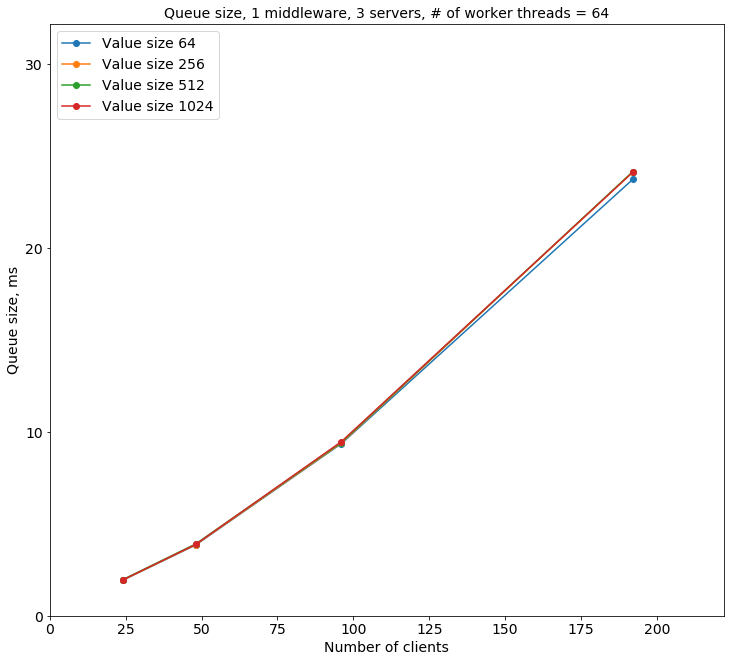

[[1.931037349170178, 3.844242723364003, 9.350770616828159, 23.71175596722278], [1.9392260972297966, 3.8618444863615804, 9.379844612029562, 24.118295374392268], [1.9625485092654644, 3.8993153209597415, 9.413893047281396, 24.129134565365707], [1.9480104072041604, 3.8749252235162617, 9.458809765352534, 24.099382071625847]]


In [60]:
print("Start drawing graphs")
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_mid_cl_"
'''TR1_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid1_TR_value_file.txt", "w")
WTR1_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid1_WTR_value_file.txt", "w")
RT1_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid1_RT_value_file.txt", "w")
QT1_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid1_QT_value_file.txt", "w")
QS1_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid1_QS_value_file.txt", "w")
ST1_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid1_ST_value_file.txt", "w")
PT1_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid1_PT_value_file.txt", "w")

TR2_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid2_TR_value_file.txt", "w")
WTR2_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid2_WTR_value_file.txt", "w")
RT2_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid2_RT_value_file.txt", "w")
QT2_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid2_QT_value_file.txt", "w")
QS2_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid2_QS_value_file.txt", "w")
ST2_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid2_ST_value_file.txt", "w")
PT2_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid2_PT_value_file.txt", "w")

TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_TR_value_file.txt", "w")
WTR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_WTR_value_file.txt", "w")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_RT_value_file.txt", "w")
QT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_QT_value_file.txt", "w")
QS_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_QS_value_file.txt", "w")
ST_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_ST_value_file.txt", "w")
PT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_PT_value_file.txt", "w")
'''

X_axis = [i * 6 for i in client_numbers]
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    
    TR_error_overall = []
    RT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for client_number in client_numbers:
            subset = global_data_10[(global_data_10['Worker threads'] == w) &
                                 (global_data_10['Value size'] == value_size) & 
                                 (global_data_10['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Middleware', 'Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            #TR.append(groupped3.groupby(['Middleware','Repetition']).sum().groupby(['Middleware']).mean().sum())
            TR.append(groupped3.groupby(['Middleware','Repetition']).sum().groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Middleware','Repetition']).sum().groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        
    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 2 middlewares, 3 servers configuration, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 2 middlewares, 3 servers, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Throughput VS Response time with 2 middlewares and 3 servers configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(TR_overall[i], RT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.show()
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(QT_overall)):
        plt.plot(X_axis, QT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(QT_overall[i]) + max(QT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 3, 1))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Queue time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(QT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Service time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(ST_overall)):
        plt.plot(X_axis, ST_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(ST_overall[i]) + max(ST_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 0.2))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Service time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(ST_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Process time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(PT_overall)):
        plt.plot(X_axis, PT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(PT_overall[i]) + max(PT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 0.2))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Process time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(PT_overall)
    
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue size, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(QS_overall)):
        plt.plot(X_axis, QS_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(QS_overall[i]) + max(QS_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 10))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Queue size, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_qs.pdf")
    plt.show()
    print(QS_overall)

Start drawing graphs


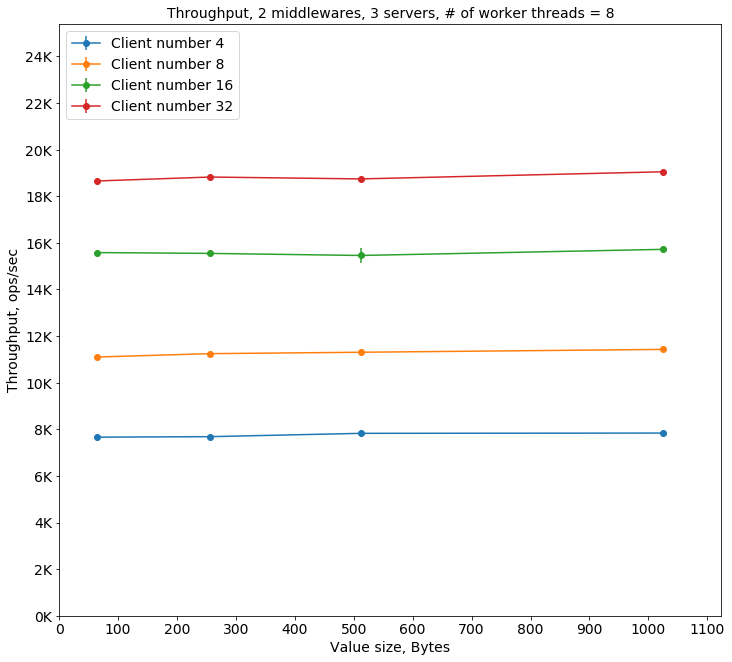

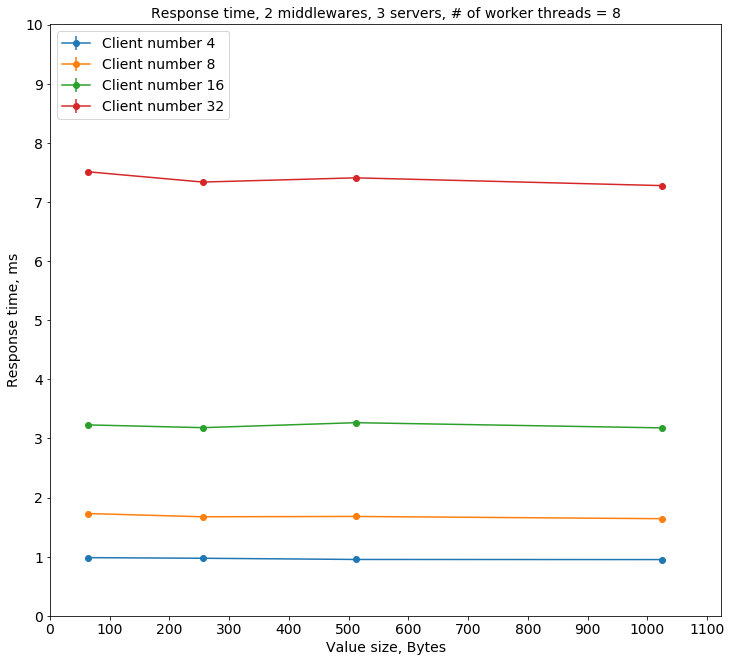

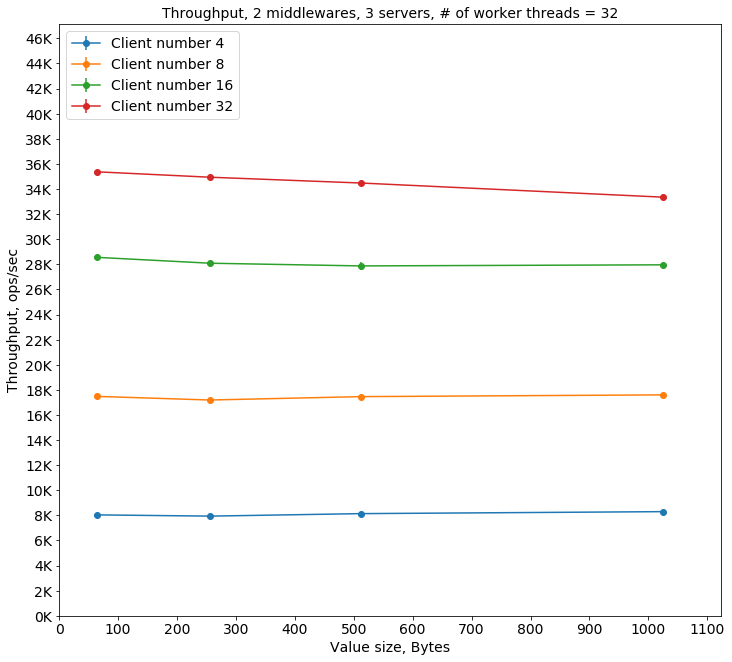

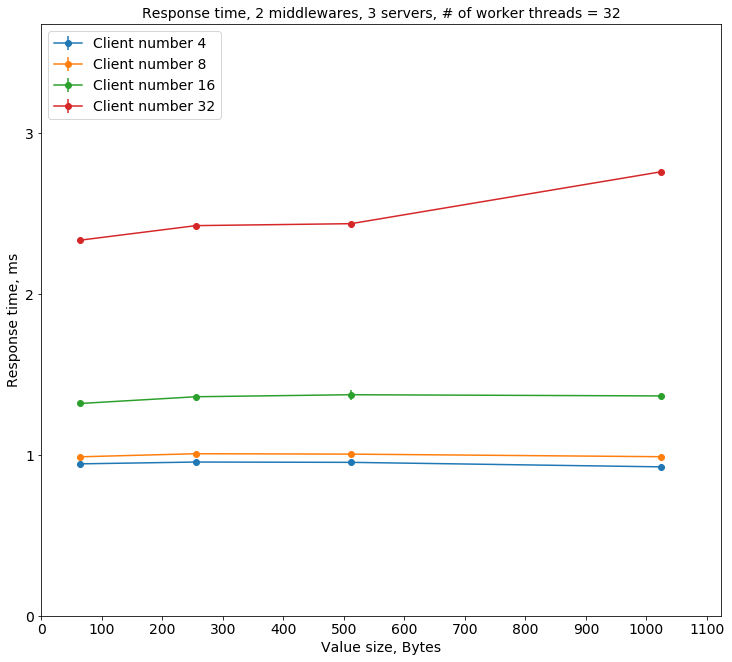

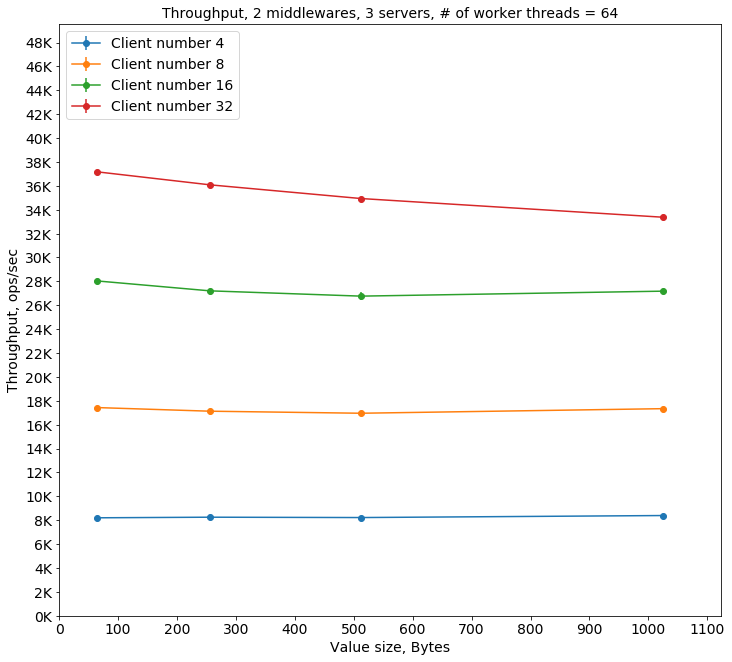

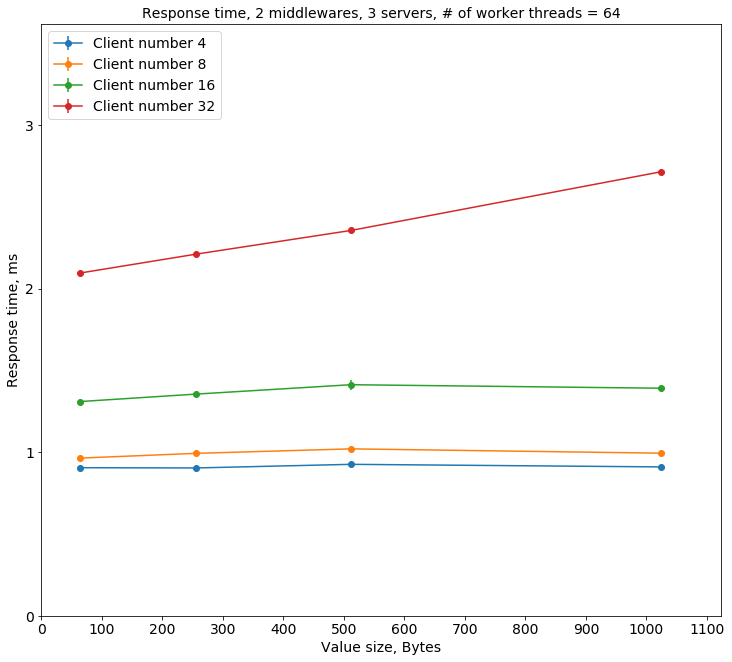

In [61]:
print("Start drawing graphs")
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_mid_vl_"
X_axis = value_sizes
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    for client_number in client_numbers:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for value_size in value_sizes:
            subset = global_data_10[(global_data_10['Worker threads'] == w) &
                                 (global_data_10['Value size'] == value_size) & 
                                 (global_data_10['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Middleware', 'Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            #TR.append(groupped3.groupby(['Middleware','Repetition']).sum().groupby(['Middleware']).mean().sum())
            TR.append(groupped3.groupby(['Middleware','Repetition']).sum().groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Middleware','Repetition']).sum().groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        
    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 2 middlewares, 3 servers, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Value size, Bytes')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 2 middlewares, 3 servers, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
        plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Value size, Bytes') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    plt.show()

## Client part

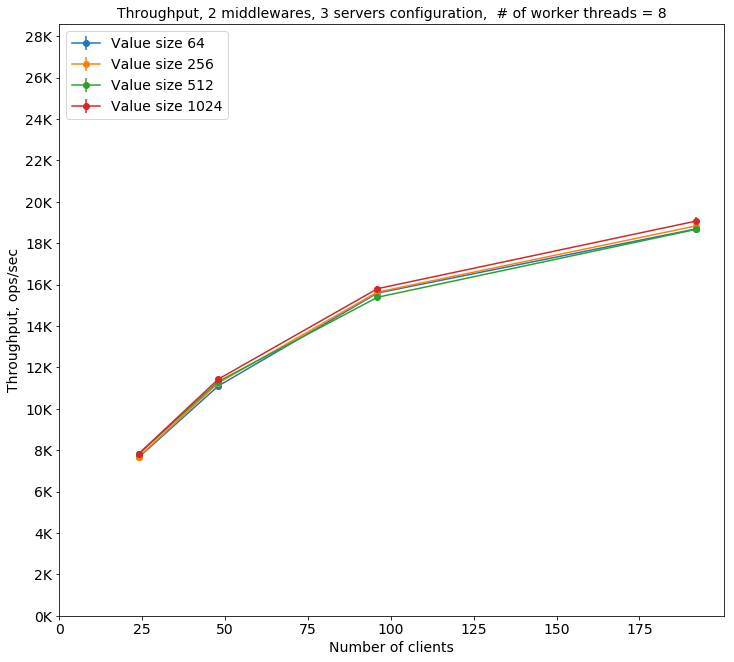

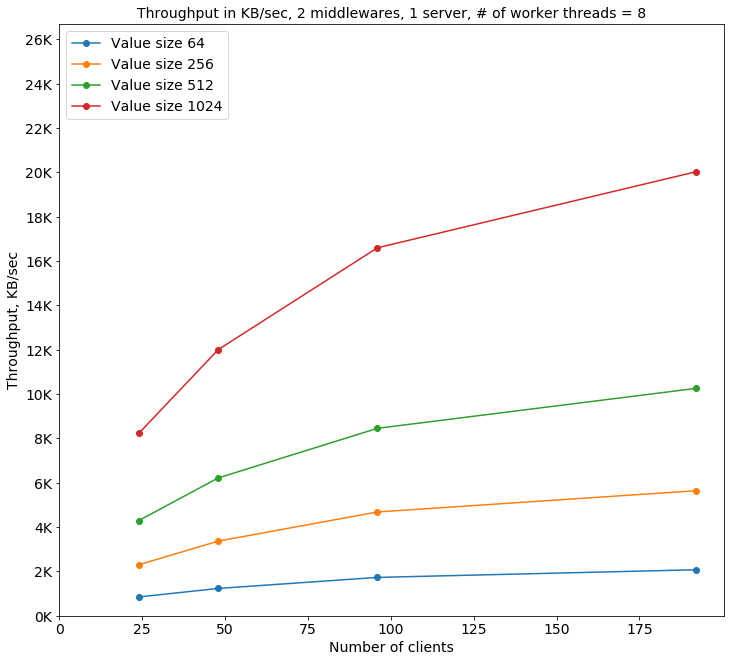

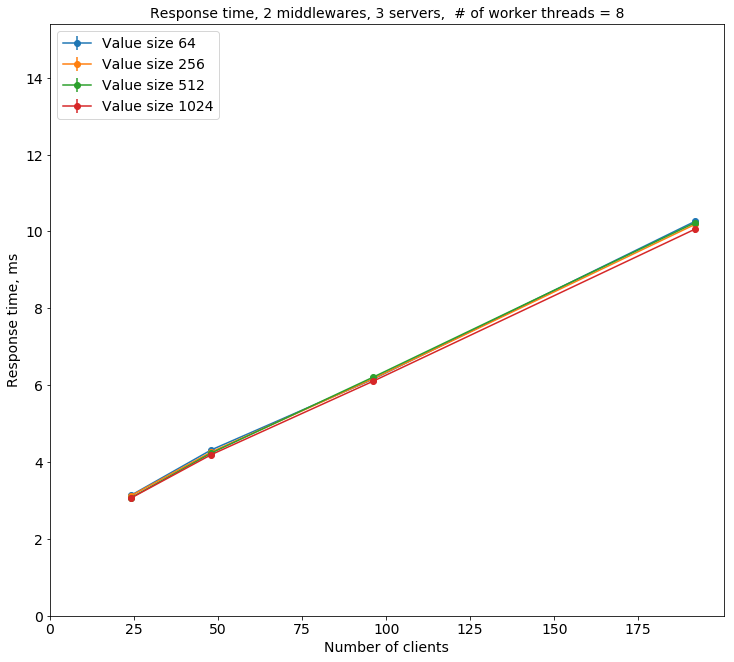

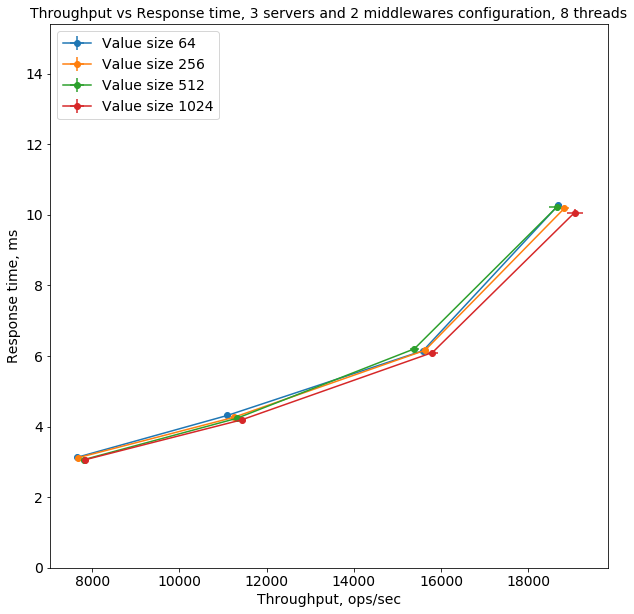

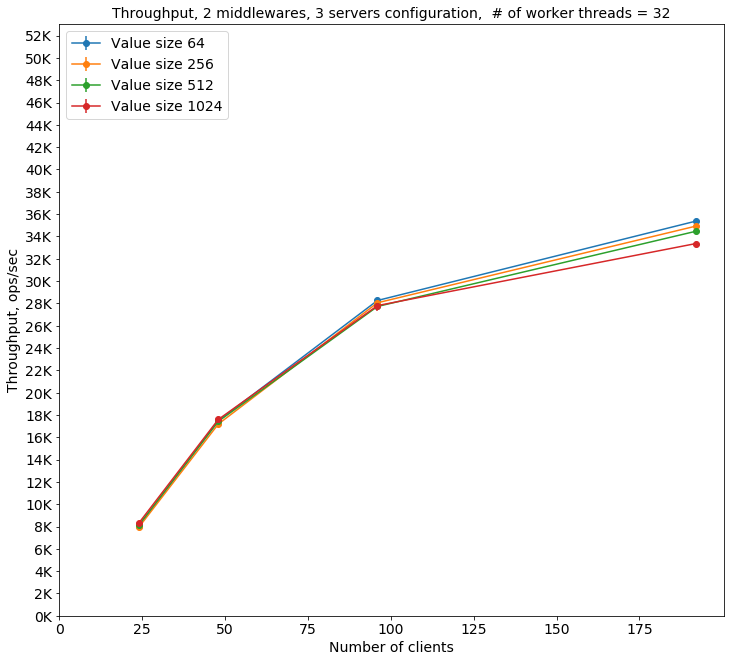

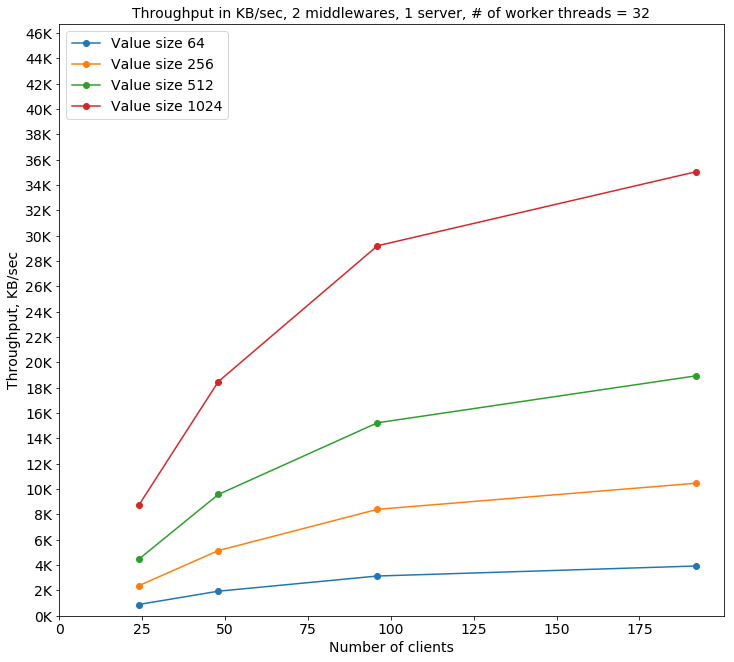

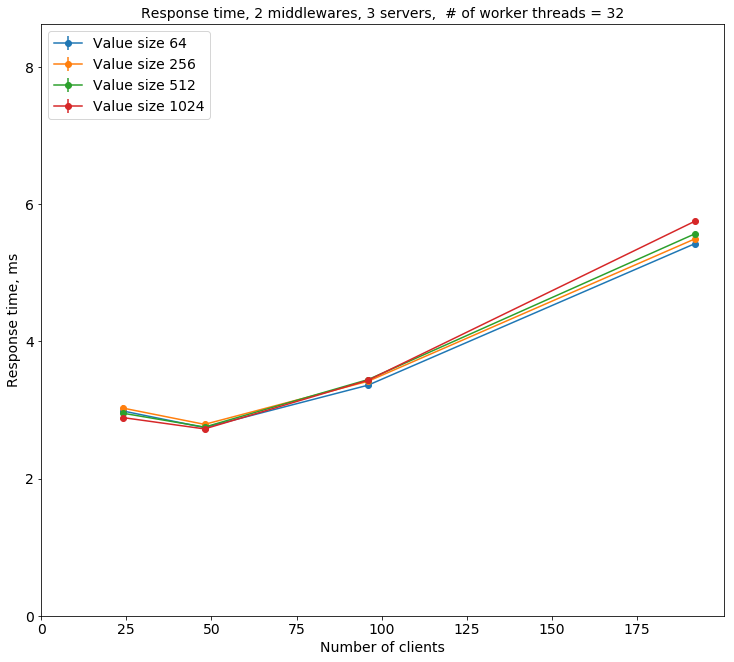

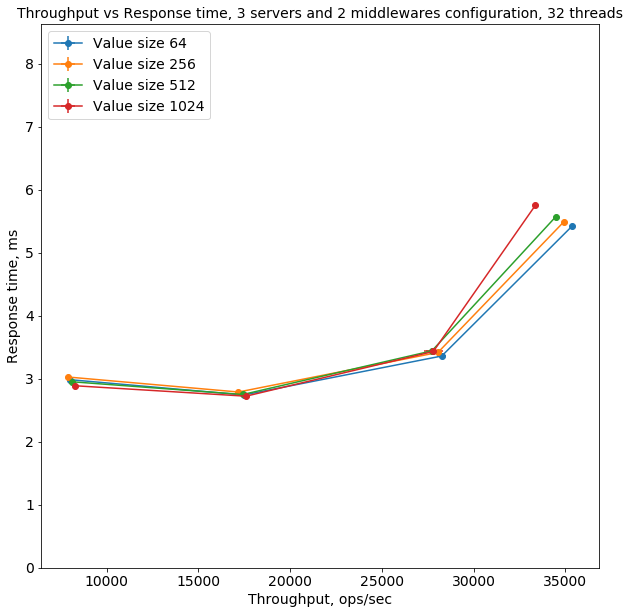

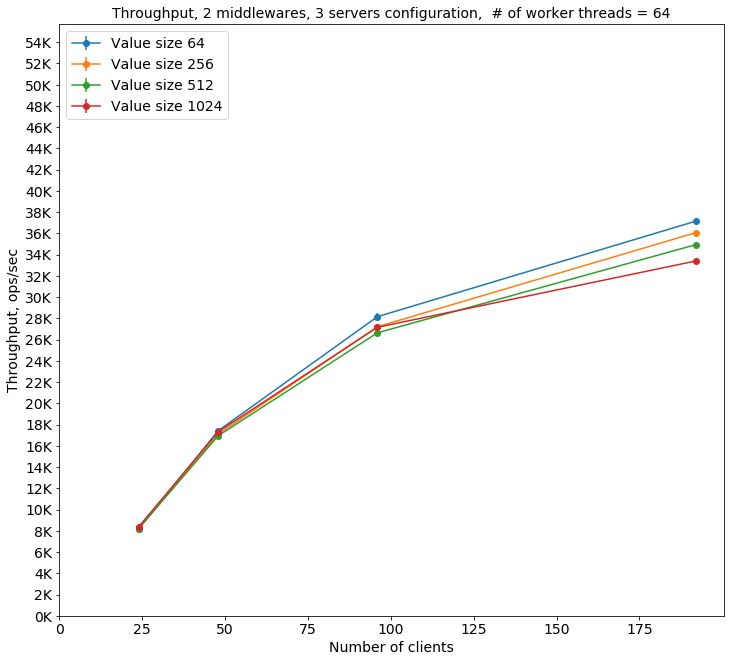

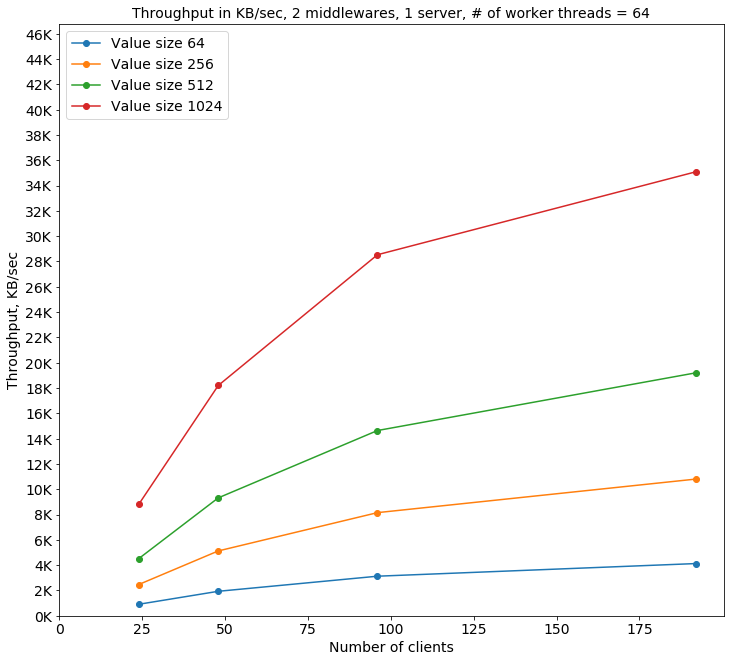

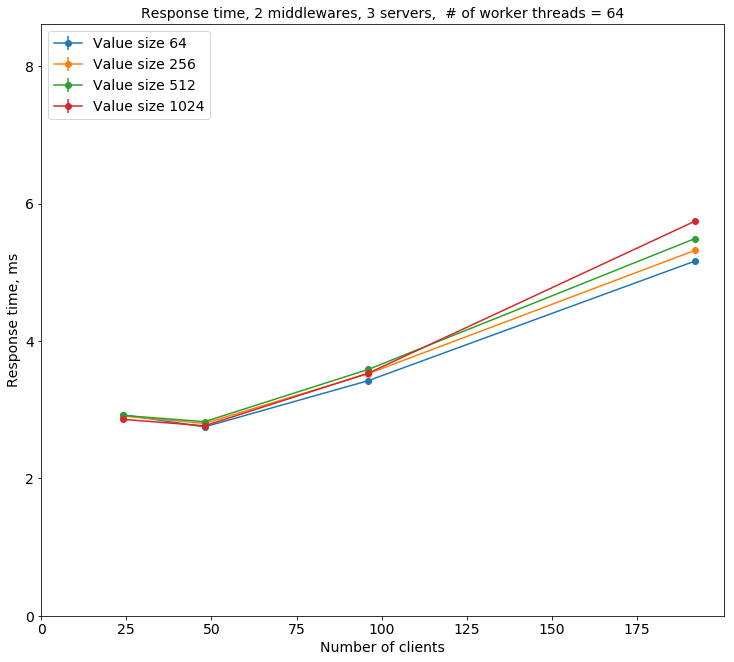

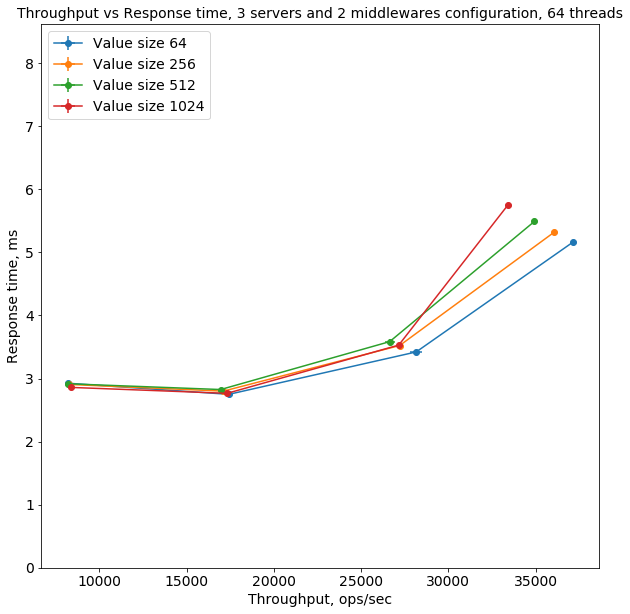

In [62]:
TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_cl_TR_value_file.txt", "w+")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_cl_RT_value_file.txt", "w+")


path_to_experiment="/home/anastasiia/final_ex/final_copy/part6/"
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_mid_cl_cl_"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 6
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], parts[5], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'TR_B', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2], clients_data[memtier * experiments + k][3]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['TR_B'] = global_data['TR_B'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis =[i * 6 for i in client_numbers]

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_B_overall = []
    TR_error_overall = []
    RT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        TR_B = []
        TR_error = []
        RT_error = []

        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            # print to file
            TR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped.mean()['TR']))
            for v in groupped['TR'].values:
                TR_value_file.write(" " + str(v))
            TR_value_file.write("\n")
            
            # end print to file
            
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
             # print to file
            RT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped2.mean()))
            for v in groupped2.values:
                RT_value_file.write(" " + str(v))
            RT_value_file.write("\n")
            # end print to file
            
            groupped3 = subset.groupby(['Repetition']).sum()
            TR_B.append(float(groupped3.mean()['TR_B']))
            
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        TR_B_overall.append(TR_B)

    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 2 middlewares, 3 servers configuration,  # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_tr.pdf")
    plt.show()
    
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput in KB/sec, 2 middlewares, 1 server, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_B_overall)):
        plt.plot(X_axis, TR_B_overall[i],'-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_B_overall[i]) + max(TR_B_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, KB/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_tr_b.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 2 middlewares, 3 servers,  # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_rt.pdf") 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput vs Response time, 3 servers and 2 middlewares configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.show()
TR_value_file.close()
RT_value_file.close()